# This example demonstrate how to train region classification (standart image classification model).

In [1]:
# Specify device
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
# os.environ["CUDA_VISIBLE_DEVICES"] = ""  # For CPU inference
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [2]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# Nomeroff-Net path
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

In [3]:
plt.rcParams["figure.figsize"] = (10, 10)

In [4]:
%matplotlib inline 

In [5]:
# auto download latest dataset
from nomeroff_net.tools import modelhub

# auto download latest dataset
info = modelhub.download_dataset_for_model("numberplate_options")
PATH_TO_DATASET = info["dataset_path"]
PATH_TO_TMP_CUSTOM_DATASET = f'{PATH_TO_DATASET}_base'

# local path dataset
#PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

In [6]:
PATH_TO_DATASET

'/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25'

In [7]:
PATH_TO_TMP_CUSTOM_DATASET

'/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base'

In [8]:
DATASET_NAME = "options"
VERSION = "2021_11_25_pytorch_lightning"

RESULT_PATH = os.path.join(NOMEROFF_NET_DIR, "./data/models/", 'numberplate_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [9]:
from nomeroff_net.tools import custom_options
from nomeroff_net import OptionsDetector

class_region_custom = [
    ["military-ru","military-ua"],
    "eu-ua-2015",
    "eu-ua-2004",
    "eu-ua-1995",
    "eu",
    "xx-transit",
    "ru",
    "kz",
    "eu-ua-ordlo-dpr",
    "eu-ua-ordlo-lpr",
    "ge",
    "by",
    "su",
    "kg",
    "am"
]

class_count_lines_custom = ["1", "2", "3"]

state_ids_only_labels = ["not filled"]

customOptionsMaker = custom_options.CustomOptionsMaker(
    PATH_TO_DATASET,
    PATH_TO_TMP_CUSTOM_DATASET, 
    OptionsDetector.get_class_region_all(),
    class_region_custom,
    OptionsDetector.get_class_count_lines_all(),
    class_count_lines_custom,
    OptionsDetector.get_class_state_all(),
    state_ids_only_labels,
    items_per_class = 3000
)

In [10]:
customOptionsMaker.make()

Creating path "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base" for custom options
dir: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25 option_dir: train custom_options_sub_dirs[0]: ann
Labels stat for /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25/train/ann
[((2, 14), 5145), ((0, '0'), 3960), (('1', '13'), 3088), ((1, '1'), 2597), ((1, '2'), 2434), ((1, '4'), 2298), (('1', '11'), 2025), ((1, '3'), 2020), (('1', '14'), 2017), (('1', '5'), 1743), ((1, '6'), 1707), (('2', '6'), 1664), ((1, '7'), 1639), ((1, '12'), 1616), (('1', 10), 1503), (('2', '1'), 1112), (('2', '11'), 1064), (('1', '10'), 1015), (('2', '10'), 975), (('1', '12'), 851), ((1, '5'), 830), (('2', 14), 814), ((1, 16), 733), ((2, 7), 

In [11]:
customOptionsMaker.rebalance_count_lines('train', True, True)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Prepare data for count_lines: 0
Crop class count_lines 0 to 3000
Prepare data for count_lines: 2
Increase class region_id 2 from 717 to 3000
Multiply 717 class data in 4 times and add random 132 items of class
Make full copy for index 1
Try make duplicate/augmentation for 717 items
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_233850182_BH9778II.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_235202042_AA8AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_266385552_BH1787IE.png"
Make augmented file: "/var/www/nomeroff-net24/no

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_240944909_BH38AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_341215778_BC28AP.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_322695425_AHMMT7A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_214332063_AATTBT.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberpla

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_340607077_BT1731IA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_345061493_ABH58AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_eu-ua-2004_325927333_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_kZRfSpWtBF5X9nsH41AO0rNbTc2aEGegzUvuxYiqy6P8Mjh7JL.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDe

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_353512759_AIET1AB.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_280636818_BI706A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_195377527_AHA36AC.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_328728284_AI8AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberpla

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_333836356_AA7IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_288099336_AC10AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_eu-ua-2015_321592429_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_277797153_BT53AB.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_option

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_eu-ua-2015_326364168_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_eu-ua-2015_300373741_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_237086772_HE7676AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_242914110_AA518AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/a

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_285894054_AA3318I.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_253295428_AM9IA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_eu-ua-2015_323414780_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_208792033_BH1198IA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_opt

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_242703362_AE8AC.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_349824118_AAE0IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_332894118_AH128MTIA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_345862035_AX3CI.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberpla

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_eu-ua-2004_373846475_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_eu-ua-2015_325060830_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_279841887_BC738IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_14011194-14011194--05 AA 1354- Honda VT Series-0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numb

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_334204790_AT7977IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_241098524_AH86AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_eu-ua-2015_318691050_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_329802691_AM36AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_opt

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_eu-ua-2015_327199971_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_352466035_AEAP6AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_eu-ua-2004_303995392_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_348016549_BH39IA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/aut

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_tBhxcoaU7gViKCAbmGdXWH3kFqTRM941DJwI0Q68ZSepjflzE5.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_346872358_AI30IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_283208144_AH936IB.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_336312112_BH8A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/Option

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_208981670_BT1316AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_324560140_BHA81XE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_283998600_AAI8IB.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_344596921_BC37IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberp

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_285287838_AEE67AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_351974522_AA78AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_283894949_AH387A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_AB 2622.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumb

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_wD2ZWT5sQqOhXaymfjpMVxeIoUJiGvrkuFcn8AzKdLlBN1tE39.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_O7FB45lQtgZioC8KS2LxEPqDwHRG0jupbYT9UVan1hAfJMrIzX.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_194246077_AHT18AT.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_343644823_BKC586AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/..

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_KpYPcWe9DnLbmUO8X4tQquVIhSNlojA0sJFG23M1fgk7E6Rxid.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_328912219_AMAMHK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2015_348089402_BAE8IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_1_3_eu_ua_2004_248639686_AI30A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/Option

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_195970277_AH16A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2015_290265586_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_239502208_AT0AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_287866438_BH83AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_343614788_BC7301IA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2015_290525825_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_321915491_AE71IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_240364324_AHM816A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_op

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_PK-500-RA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2015_276668485_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2015_285653060_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2004_244608948_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDatase

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_348418147_BBT137A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2015_323232974_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2015_290634806_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_347189963_AH1AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/auto

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2015_289347081_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_351615815_BH81IP.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_281233733_BI680AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_333492502_BC1180IA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_op

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_351515170_BI8IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_17095132-17095132--T1 BP 5788- SYM X-0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_336911543_AI181IA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_314284576_BH133AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_348185553_BT1187IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_233606270_BE787AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_304575990_AHMT37AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_299805327_AAAE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberp

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_342429701_BHHT13AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2015_324237508_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2015_322911589_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_335255345_BH8AP.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/aut

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_350859247_BEE9EAK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2015_301983109_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_248898557_AH7377CA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_274702943_BB173AC.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_o

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_329802691_AM36AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_240455644_AE61A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_343745125_BE8AB.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_302090318_AA5217AP.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplat

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2015_327199971_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_352466035_AEAP6AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2004_303995392_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_348016549_BH39IA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/aut

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_335991689_AHMMTIE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_325630622_BC3IP.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_tBhxcoaU7gViKCAbmGdXWH3kFqTRM941DJwI0Q68ZSepjflzE5.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_346872358_AI30IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/Optio

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_346657509_AH86A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2015_321409910_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_208981670_BT1316AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_324560140_BHA81XE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_opt

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_330005596_AI68IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_322767383_BBT1AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_325521676_BAC63KA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_281994844_AE0IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplat

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_234087052_AAIE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_eu-ua-2015_320917347_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_NRmyDUdelGot5M6EZPYFA4VIKhHQJXsqrW3O290pvSi8j7CxBf.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_348354577_AE8EA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2004_194292861_BI8AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_280367021_AET63AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_Bw8fO9cbYPXiK04pI7yAovhHjSUmFC1JDeWlLNTq632Rkxt5dM.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_2_3_eu_ua_2015_351950717_BH03IB.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/Optio

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_eu-ua-2015_324271120_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_264947317_BH5386AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_352820407_AI1AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_195970277_AH16A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_optio

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_TYS9APvcf3IFkzCbLuBlo7rNG6HsnmOtdj5WXw2V41hyqiJagD.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_343186529_AA6A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_335414019_AT0777IT.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_246519873_BT8AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/Option

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_eu-ua-2015_314788876_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_eu-ua-2015_300418511_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_337346013_BCEEP.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_287309505_AH586IA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/auto

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_350729375_BH908AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_347229265_BK88IT.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_333167904_AEEM8IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_291834361_AI6387AB.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/number

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_328490220_BTH30A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_eu-ua-2015_292137966_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_344669140_AE7116AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_242412959_AA9006I3.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_o

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_eu-ua-2015_300373741_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_237086772_HE7676AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_242914110_AA518AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_eu-ua-2015_314735662_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/a

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_267665593_BE3IB.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_337308311_AA0AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_344752686_BC177AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_283988072_AC13AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_338038042_AI197IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_339510036_BE53IB.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_290229939_AE17AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_eu-ua-2015_314776364_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_opti

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_349071183_BHE7038A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_283418918_AHT6AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_346274153_BC780AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_346221523_ABHI8AAE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numbe

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_258362701_BX143AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_295803388_BH36A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_eu-ua-2015_323518044_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_eu-ua-2015_324067565_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/auto

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_352490674_BH8IIB.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_349275113_AEI8IAE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_257410634_AEM88AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_243284370_BH893A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberpl

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_340270124_AE3IA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_296232606_AAAE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_350839126_BH8IB.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_310252349_BH539A.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_op

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_289277600_BM3836AH.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_342652244_AA1137AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_322942449_BH8AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_351434960_BH03IB.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberp

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_325521676_BAC63KA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_281994844_AE0IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_340217128_BE95AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_353977095_AEE330IE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberpl

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_267999085_AAM90HA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_eu_ua_2015_319951041_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2015_269342566_AAE236TK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_eu-ua-2015_285049691_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/a

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_BE-478-BD.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_eu-ua-2004_326601882_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_KpYPcWe9DnLbmUO8X4tQquVIhSNlojA0sJFG23M1fgk7E6Rxid.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_3_3_eu_ua_2004_328912219_AMAMHK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_opti

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_4_rwJvpmByHuKqC0NIR8gMjkozaA3eLPDnlt26fUiE1cXTSWVFO5.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_4_3_eu_ua_2004_349524608_BH898AK.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_4_eu-ua-2015_325382386_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_4_eu-ua-2015_276668485_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/nu

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_4_3_eu_ua_2015_277950692_APT74AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_4_3_eu_ua_2004_308633564_AT798AE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_4_3_eu_ua_2015_324796076_BAT96BH.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_4_eu-ua-2015_320764758_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_op

Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_4_3_eu_ua_2015_350443755_BCBH9EAE.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_4_3_eu_ua_2004_333616609_AMM96AB.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_4_eu-ua-2015_323223774_0.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/aug_4_3_eu_ua_2004_236133601_AEMEAEA.png"
Make augmented file: "/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_o

1

In [12]:
class MyNpClassificator(OptionsDetector):
    def __init__(self):
        OptionsDetector.__init__(self)
        
        # outputs 2
        #self.class_region = class_region_custom
        self.class_region = ["military",
            "eu-ua-2015",
            "eu-ua-2004",
            "eu-ua-1995",
            "eu",
            "xx-transit",
            "ru",
            "kz",
            "eu-ua-ordlo-dpr",
            "eu-ua-ordlo-lpr",
            "ge",
            "by",
            "su",
            "kg",
            "am"
        ]
        
        # output 3
        self.count_lines = class_count_lines_custom
        
        self.epochs           = 100
        self.batch_size       = 32
        
        # count gpu for train
        self.gpus = 1
        
        self.height         = 64
        self.width         = 295

In [13]:
# initialize region detector.
npClassificator = MyNpClassificator()
npClassificator.prepare(PATH_TO_TMP_CUSTOM_DATASET, verbose=1, num_workers=24)

START PREPARING
DATA PREPARED


In [14]:
# train
lr_finder = npClassificator.tune()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name            | Type        | Params
-------------------------------------------------
0  | resnet          | Sequential  | 2.8 M 
1  | dropout_reg     | Dropout     | 0     
2  | fc1_reg         | Linear      | 10.0 M
3  | fc2_reg         | Linear      | 131 K 
4  | batch_norm_reg  | BatchNorm1d | 1.0 K 
5  | fc3_reg         | Linear      | 3.9 K 
6  | dropout_line    | Dropout     | 0     
7  | fc1_line        | Linear      | 10.0 M
8  | fc2_line        | Linear      | 131 K 
9  | batch_norm_line | BatchNorm1d | 1.0 K 
10 | fc3_line        | Linear      | 771   
-------------------------------------------------
23.0 M    Trainable params
0         Non-trainable params
23.0 M    Total params
91.904    Total estimated model params size (MB)


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Learning rate set to 0.8317637711026709


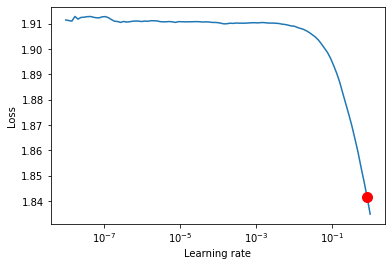

In [15]:
%matplotlib inline
# Results can be found in
lr_finder["lr_find"].results

# Plot with
fig = lr_finder["lr_find"].plot(suggest=True)
fig.show()

In [16]:
# train
model = npClassificator.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



   | Name            | Type        | Params
-------------------------------------------------
0  | resnet          | Sequential  | 2.8 M 
1  | dropout_reg     | Dropout     | 0     
2  | fc1_reg         | Linear      | 10.0 M
3  | fc2_reg         | Linear      | 131 K 
4  | batch_norm_reg  | BatchNorm1d | 1.0 K 
5  | fc3_reg         | Linear      | 3.9 K 
6  | dropout_line    | Dropout     | 0     
7  | fc1_line        | Linear      | 10.0 M
8  | fc2_line        | Linear      | 131 K 
9  | batch_norm_line | BatchNorm1d | 1.0 K 
10 | fc3_line        | Linear      | 771   
-------------------------------------------------
23.0 M    Trainable params
0         Non-trainable params
23.0 M    Total params
91.904    Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/train/lightning_logs/version_1/checkpoints/epoch=52-step=74570.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc_line': 0.9995509386062622,
 'test_acc_reg': 0.9987699389457703,
 'test_accuracy': 0.9991604089736938,
 'test_loss': 1.184995174407959}
--------------------------------------------------------------------------------


In [17]:
npClassificator.prepare(PATH_TO_DATASET, verbose=1)

START PREPARING
DATA PREPARED


In [18]:
npClassificator.test()

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc_line': 0.9995509386062622,
 'test_acc_reg': 0.9987699389457703,
 'test_accuracy': 0.9991604089736938,
 'test_loss': 1.184995174407959}
--------------------------------------------------------------------------------


[{'test_loss': 1.184995174407959,
  'test_accuracy': 0.9991604089736938,
  'test_acc_reg': 0.9987699389457703,
  'test_acc_line': 0.9995509386062622}]

In [19]:
npClassificator.save(RESULT_PATH)

model save to /var/www/nomeroff-net24/./data/models/numberplate_options_2021_11_25_pytorch_lightning.ckpt


# Classification Report

In [20]:
npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [21]:
from nomeroff_net.data_modules.data_loaders import ImgGenerator
from sklearn.metrics import classification_report
import torch

def options_classification_report(npClassificator, 
                                  path_dir=os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "test"), 
                                  mode_torch="gpu"):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    imageGenerator.build_data()
    gen = imageGenerator.path_generator()
    
    out_idx_reg_all = []
    out_idx_line_all = []
    label_idx_reg_all = []
    label_idx_line_all = []
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
            npClassificator.model.cuda()
        with torch.no_grad():
            outputs = npClassificator.model(inputs)
        label_reg = torch.from_numpy(labels[0])
        label_cnt = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
            label_cnt = label_cnt.cuda()
        
        out_idx_reg = torch.max(outputs[0], 1)[1].cpu().numpy()
        out_idx_line = torch.max(outputs[1], 1)[1].cpu().numpy()
        
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        label_idx_line = torch.max(label_cnt, 1)[1].cpu().numpy()
        
        out_idx_reg_all.extend(out_idx_reg)
        out_idx_line_all.extend(out_idx_line)
        label_idx_reg_all.extend(label_idx_reg)
        label_idx_line_all.extend(label_idx_line)
    #print("npClassificator.class_region", npClassificator.class_region)
    print("\n\nclass region classification report:")
    print(classification_report(label_idx_reg_all, 
                                out_idx_reg_all, 
                                target_names=npClassificator.get_class_region_for_report()))
    print("\n\ncount lines classification report:")
    print(classification_report(label_idx_line_all, 
                                out_idx_line_all, 
                                target_names=npClassificator.count_lines))

In [22]:
options_classification_report(npClassificator, path_dir=os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "test"))



class region classification report:
                 precision    recall  f1-score   support

       military       1.00      1.00      1.00       101
     eu-ua-2015       1.00      1.00      1.00       978
     eu-ua-2004       1.00      1.00      1.00       935
     eu-ua-1995       1.00      1.00      1.00       915
             eu       1.00      1.00      1.00       990
     xx-transit       1.00      1.00      1.00       413
             ru       1.00      1.00      1.00       191
             kz       1.00      0.99      1.00       664
eu-ua-ordlo-dpr       1.00      1.00      1.00        44
eu-ua-ordlo-lpr       1.00      1.00      1.00        27
             ge       1.00      1.00      1.00       376
             by       1.00      0.96      0.98        23
             su       0.99      1.00      1.00       273
             kg       0.99      1.00      0.99        95
             am       1.00      1.00      1.00       375

       accuracy                           1.00  

# Check small accuracy images

In [23]:
class MyNpClassificator(OptionsDetector):
    def __init__(self):
        OptionsDetector.__init__(self)
        
        # outputs 2
        #self.class_region = class_region_custom
        self.class_region = ["military",
            "eu-ua-2015",
            "eu-ua-2004",
            "eu-ua-1995",
            "eu",
            "xx-transit",
            "ru",
            "kz",
            "eu-ua-ordlo-dpr",
            "eu-ua-ordlo-lpr",
            "ge",
            "by",
            "su",
            "kg",
            "am"
        ]
        
        # output 3
        self.count_lines = class_count_lines_custom
        
        self.epochs           = 200
        self.batch_size       = 32
        
        # count gpu for train
        self.gpus = 1
        
        self.height         = 64
        self.width         = 295
npClassificator = MyNpClassificator()
npClassificator.prepare(PATH_TO_TMP_CUSTOM_DATASET, verbose=1, num_workers=24)

START PREPARING
DATA PREPARED


In [24]:
npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [25]:
%matplotlib inline

In [26]:
#npClassificator.class_region = npClassificator.get_class_region_for_report()

In [29]:
from nomeroff_net.data_modules.data_loaders import ImgGenerator
import torch
import json
import cv2
import matplotlib.pyplot as plt

def show_img(img_path):
    img = cv2.imread(img_path)
    img = img[..., ::-1]
    plt.imshow(img)
    plt.show()
    
def mark_for_moderation(p):
    json_filepath = p.replace('/img/','/ann/').replace('.png','.json')
    item_data = json.load(open(json_filepath, 'r'))
    if not item_data['moderation']:
        item_data['moderation'] = { "moderatedBy": "dimabendera" }
    item_data['moderation']["isModerated"] = 0
    with open(json_filepath, "w") as json_file:
        json.dump(item_data, json_file)    

def small_acc(npClassificator, 
              path_dir=os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "test"), 
              mode_torch="gpu", 
              min_acc=0.75):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    print("start imageGenerator build")
    imageGenerator.build_data()
    print("end imageGenerator build")
    gen = imageGenerator.path_generator()

# (npClassificator, 
#               path_dir=os.path.join(PATH_TO_DATASET, "test"), 
#               mode_torch="gpu", 
#               min_acc=0.75):
#     imageGenerator = ImgGenerator(
#         path_dir,
#         npClassificator.width,
#         npClassificator.height,
#         npClassificator.batch_size,
#         [len(npClassificator.class_region), len(npClassificator.count_lines)])
#     print("start imageGenerator build")
#     imageGenerator.build_data()
#     print("end imageGenerator build")
#     gen = imageGenerator.path_generator()
    cnt = 0
    cnt_all = 0
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
        outputs = npClassificator.model(inputs)
        label_reg = torch.from_numpy(labels[0])
        label_cnt = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
            label_cnt = label_cnt.cuda()
        out_idx_reg = torch.max(outputs[0], 1)[1].cpu().numpy()
        out_idx_line = torch.max(outputs[1], 1)[1].cpu().numpy()
        
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        label_idx_line = torch.max(label_cnt, 1)[1].cpu().numpy()
        
        # check reg
        for o, l, p, tens in zip(out_idx_reg, label_idx_reg, img_paths, outputs[0]):
            cnt_all += 1
            if o != l:
                print("[WRONG REGION PREDICTED] pred {}[{}] -> {}[{}] source: {}".format(o,npClassificator.class_region[o], l, npClassificator.class_region[l], p))
                #mark_for_moderation(p)
                show_img(p)
                cnt += 1
    print("Wrong detection: {} numberplates of {}".format(cnt, cnt_all))
#             elif tens[l] < min_acc:
#                 print("[SMALL ACC REGION PREDICTED]  pred", o, l, tens[l], p)
#                 show_img(p)
        # check line
#         for o, l, p, tens in zip(out_idx_line, label_idx_line, img_paths, outputs[1]):
#             if o != l:
#                 print("[WRONG LINE PREDICTED]  pred", o, l, p)
#                 show_img(p)
#             elif tens[l] < min_acc:
#                 print("[SMALL ACC LINE PREDICTED]  pred", o, l, tens[l], p)
#                 show_img(p)
    

start imageGenerator build
end imageGenerator build
[WRONG REGION PREDICTED] pred 12[su] -> 7[kz] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/test/img/12551140.jpg-0.png


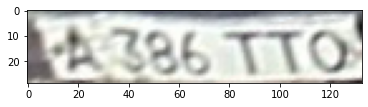

[WRONG REGION PREDICTED] pred 13[kg] -> 11[by] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/test/img/10299_5KBT1943_0.png


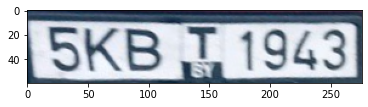

[WRONG REGION PREDICTED] pred 4[eu] -> 7[kz] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/test/img/12209128.jpg-1.png


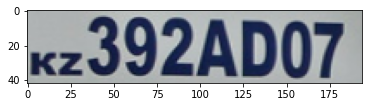

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 7[kz] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/test/img/05AE14-0.png


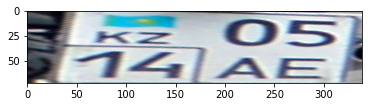

[WRONG REGION PREDICTED] pred 4[eu] -> 7[kz] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/test/img/31244487-1-full.jpg-0.png


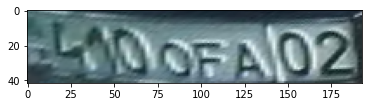

[WRONG REGION PREDICTED] pred 12[su] -> 7[kz] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/test/img/90955706-32-full.jpg-0.png


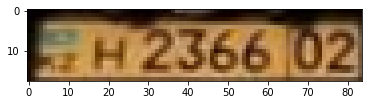

[WRONG REGION PREDICTED] pred 10[ge] -> 4[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/test/img/260659854.png


[WRONG REGION PREDICTED] pred 1[eu-ua-2015] -> 4[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/test/img/260553981.png


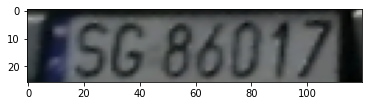

Wrong detection: 8 numberplates of 6400


In [30]:
small_acc(npClassificator, os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "test"))

start imageGenerator build
end imageGenerator build
[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 1[eu-ua-2015] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/eu-ua-2015_324271120_0.png


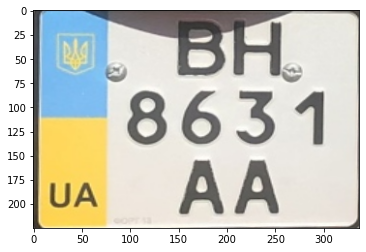

[WRONG REGION PREDICTED] pred 1[eu-ua-2015] -> 6[ru] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/DuVbNHwULTlZFmfhrJtaCA073oqsOj85R2iGdnPYeKykI4EcQg.png


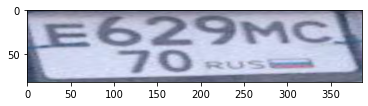

[WRONG REGION PREDICTED] pred 11[by] -> 4[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/train/img/xx-unknown_380996069_0.png


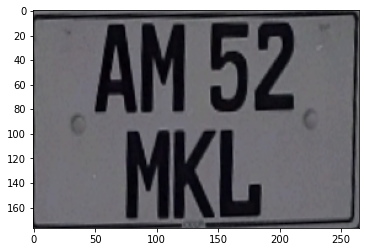

Wrong detection: 3 numberplates of 44992


In [31]:
small_acc(npClassificator, os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "train"))

start imageGenerator build
end imageGenerator build
[WRONG REGION PREDICTED] pred 8[eu-ua-ordlo-dpr] -> 6[ru] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/val/img/T161XX98_1.png


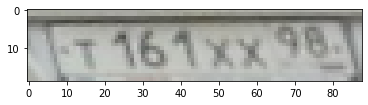

[WRONG REGION PREDICTED] pred 8[eu-ua-ordlo-dpr] -> 4[eu] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/val/img/259997233.png


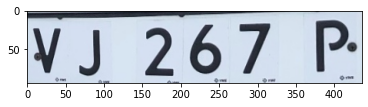

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 1[eu-ua-2015] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/val/img/260237603.png


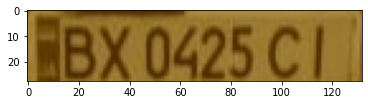

[WRONG REGION PREDICTED] pred 8[eu-ua-ordlo-dpr] -> 6[ru] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/val/img/A440AA39_1.png


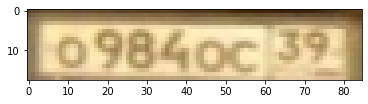

[WRONG REGION PREDICTED] pred 4[eu] -> 3[eu-ua-1995] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/val/img/260848097.png


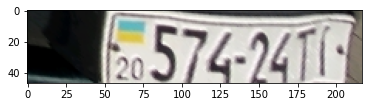

[WRONG REGION PREDICTED] pred 14[am] -> 11[by] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/val/img/1142_KBT5972_0.png


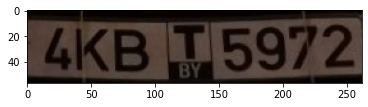

[WRONG REGION PREDICTED] pred 13[kg] -> 12[su] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/val/img/121973_Г3983ДЦ_0_1.png


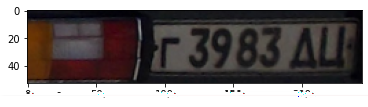

[WRONG REGION PREDICTED] pred 4[eu] -> 10[ge] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/val/img/39282498-39282498_4_0.png


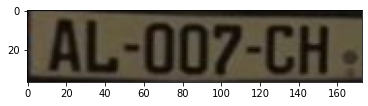

[WRONG REGION PREDICTED] pred 3[eu-ua-1995] -> 10[ge] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/val/img/38884494-38884494_7_0.png


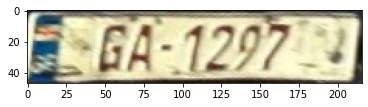

[WRONG REGION PREDICTED] pred 13[kg] -> 7[kz] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/val/img/T046BS.png


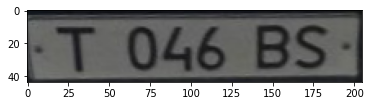

[WRONG REGION PREDICTED] pred 4[eu] -> 10[ge] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/val/img/38269314-38269314_8_0.png


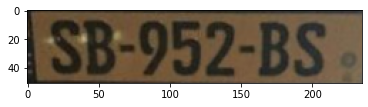

[WRONG REGION PREDICTED] pred 2[eu-ua-2004] -> 1[eu-ua-2015] source: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/OptionsDetector/numberplate_options/autoriaNumberplateOptionsDataset-2021-11-25_base/val/img/260100111.png


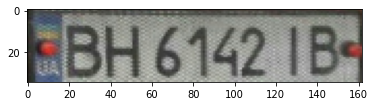

Wrong detection: 12 numberplates of 7168


In [40]:
small_acc(npClassificator, os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "val"))